# Neural Network introduction

## NN with multiple layers

In [56]:
import numpy as np

In [57]:
# to get PIL -> pip install Pillow
from PIL import Image
from IPython.display import display

def red_png(path, factor=0.3, yes=0 , source = "DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine"):
    '''This function to display a reduce image.png
    Args:
        path : directory/image.png
        factor : the reduction factor
        yes : set to 0 by default, if put to 1 it means that the size before and after will be displayed
    '''
    img = Image.open(path)
    if yes:
        print("Taille d'origine :", img.size)

    # Redimensionner l'image à 50% de sa taille d'origine
    new_size = (int(img.width * factor), int(img.height * factor))
    img_resized = img.resize(new_size)

    # Afficher la nouvelle taille de l'image
    if yes:
        print("Nouvelle taille :", img_resized.size)

    # Afficher l'image redimensionnée dans le notebook
    display(img_resized)
    print(f'Source: ', source)

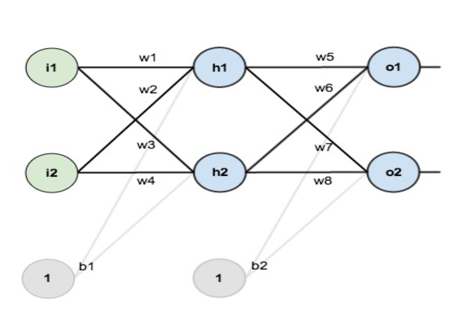

Source:  DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [ ]:
red_png(r'./../png/Perceptron.png', factor=.4)

### Example on the Perceptron to understand the backpropagation

Neural network with:
- two inputs $(i_1, i_2)$,
- two outputs $(o_1, o_2)$ and 
- two hidden units $(h_1, h_2) making one hidden layer$ 

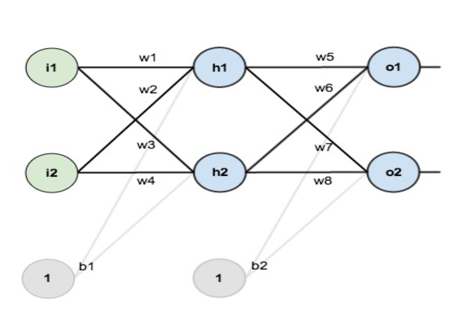

Source:  DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [ ]:
red_png(r'./../png/Perceptron.png', factor=.4)

In this image, you have an "input" layer, an hidden layer and an output layer.  

It is a two-layer network because by convention, the input layer is not counted.

Objective
- Write a code for the random initialisation
- Write a code for the forward pass.
- Compute the mean square error
- Backpropagate the error
- Train the network

In [ ]:
# Sigmoid as the activation function
import numpy as np

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [ ]:
# To avoid overflow (_débordements_) we should rather use this function
import numpy as np

def sigmoid(x):
    s = expit(x)
    return s

In [ ]:
print(sigmoid(0))

0.5


# The Forward Pass

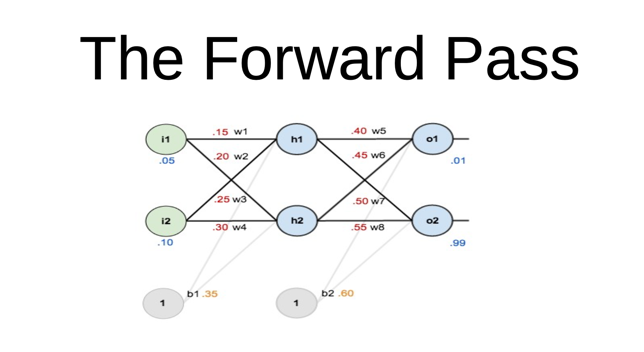

Source:  DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [ ]:
red_png(r'./../png/NN_Fwd_Pass.png', factor=.4)

In [ ]:
import math

# The inputs
i1 = .05
i2 = .10

# The outputs (targets)
o1 = .01
o2 = .99

# Initialisation of the input weights
w1 = .15
w2 = .20
w3 = .25
w4 = .30

# Initialisation of the bias
b1 = .35

# Initialisation of the output weights
w5 = .40
w6 = .45
w7 = .50
w8 = .55

# Initialisation of the bias
b2 = .60

# Targets of the two outputs
target_o1 = 0.01
target_o2 = 0.99

In [ ]:
# Forward pass with sigmoid as activation fonction

def fwd_pass(i1,i2):
    """"Formard pass"""
    # Apply the weights on the inputs
    net_h1 = i1*w1 + i2*w2 + b1*1 
    net_h2 = i1*w3 + i2*w4 + b1*1

    # Apply the activation function on the outputs
    out_h1 = sigmoid(net_h1) 
    out_h2 = sigmoid(net_h2)

    # Apply the weights on the inputs
    net_o1 = out_h1*w5 + out_h2*w6 + b2*1
    net_o2 = out_h1*w7 + out_h2*w8 + b2*1

    # Apply the activation function
    out_o1 = sigmoid(net_o1)   
    out_o2 = sigmoid(net_o2)

    # return np.array([out_o1, out_o2])
    return out_o1, out_o2

In [ ]:
out_o1, out_o2 = fwd_pass(i1,i2)

print(out_o1, out_o2)

0.7513650695523157 0.7729284653214625


With a Numpy matrix

In [ ]:
import numpy as np
np.random.seed(0)

X = np.array([i1, i2])

n_inputs = X.shape[0]
n_size = 2 # number of neurons of the hidden layers

# Initialisation of the input weights and bias
W_in = np.array([[w1,w2],[w3,w4]])
b_in = 0.35

net_h = np.dot(X, W_in.T) + b_in

out_h = sigmoid(net_h)

# Initialisation of the output weights and bias
W_out = np.array([[w5,w6],[w7,w8]])
b_out = 0.60

net_o = np.dot(out_h, W_out.T) + b_out

out_o = sigmoid(net_o)

print(out_o)

[0.75136507 0.77292847]


Weights and bias are usually assigned randomly.

In [ ]:
import numpy as np
np.random.seed(0)

X = np.array([i1, i2])

n_inputs = X.shape[0]
n_size = 2 # number of neurons of the hidden layers

W_in = 0.10 * np.random.randn(2,2)
b_in = np.random.randn(1)

net_h = np.dot(X, Win.T)

out_h = sigmoid(net_h)

W_out = 0.10 * np.random.randn(2,2)
b_out = np.random.randn(1)

net_o = np.dot(out_h, W_out.T) + b_out

out_o = sigmoid(net_o)

print(out_o)


[0.60098578 0.59814713]


In [ ]:
out_o = np.array([out_o1, out_o2])
target_o = np.array([target_o1, target_o2])

In [ ]:
out_o = np.array([fwd_pass(i1, i2)])
target_o = np.array([target_o1, target_o2])

In [ ]:
print(f"MSE = {err_mse(out_o, target_o)}")

MSE = 0.2983711087600027


# The Backward Pass

## The Output layer

Consideing $w_5$, how much a change in $w_5$ affects the total error is given by: 

$$\dfrac{\partial E_{total}}{\partial w5}$$ 

$\dfrac{\partial E_{total}}{\partial w5} $ is read as "the partial derivative of $E_{total}$ with respect to $w_5$ or the gradient with respect to $w_5$.

<div class="alert alert-info">
<b>THE CHAIN RULE</b>:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * 
  \frac{\partial net_{o1}}{\partial w_5}$$
</ul>  

  <li> (Backward) We went back in time and split the partial derivative in a product of partial derivatives from back to the beginning</li>
</div>

$E_{\text{total}} = E_{o1} + E_{o2} = \frac{1}{2} (\text{target}_{o1} - out_{o1})^2 + \frac{1}{2} (\text{target}_{o2} - \text{out}_{o2})^2$

$ \Rightarrow \dfrac{\partial E_{\text{total}}}{\partial \text{out}_{o1}} = \dfrac{1}{2}.2(-1)(\text{target}_{o1} - \text{out}_{o1}) + 0$

$ \Rightarrow \dfrac{\partial E_{\text{total}}}{\partial \text{out}_{o1}} = -(\text{target}_{o1} - \text{out}_{o1})$

$out_{o1} = \frac{1}{1 + \exp(-net_{o1})} = (1 + \exp(-net_{o1}))^{-1}$

$\overset{(u^n)^{'} = nu^{'}u^{n-1}}{\Rightarrow} \
\dfrac{\partial out_{o1}}{\partial net_{o1}} = \
(-1)(-1)\exp(-net_{o1})(1 + \exp(-net_{o1}))^{-2} =  \
\exp(-net_{o1})(1 + \exp(-net_{o1}))^{-2}$

$=\
\dfrac{\exp(-net_{o1})}{(1 + \exp(-net_{o1}))^2} = \
\dfrac{\exp(-net_{o1})}{1 + \exp(-net_{o1})} \times \dfrac{1}{1 + \exp(-net_{o1})} \underset{+ 1 - 1} = \
\dfrac{1 + \exp(-net_{o1}) - 1}{1 + \exp(-net_{o1})} \times \dfrac{1}{1 + \exp(-net_{o1})}$

$ = (\dfrac{1 + \exp(-net_{o1})}{1 + \exp(-net_{o1})} - \dfrac{1}{1 + \exp(-net_{o1})}) \times \dfrac{1}{1 + \exp(-net_{o1})} = (1 - out_{o1}) \times out_{o1}$

$\Rightarrow \dfrac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) * out_{o1}$

<u>Note:</u> $f(x) = sigmoid(x) \Longrightarrow f'(x)=(1-f(x)).f(x)$

The same way, we have:

$\dfrac{\partial E_{\text{total}}}{\partial \text{out}_{o2}} = -(\text{target}_{o2} - \text{out}_{o2})$

$\dfrac{\partial out_{o2}}{\partial net_{o2}} = (1 - out_{o2}) * out_{o2}$

$net_{o1} = w_5 . out_{h1} + w_6 . out_{h2} + b_2$ 

$\Rightarrow \dfrac{\partial net_{o1}}{\partial w_5} = out_{h1}$

$net_{o2} = w_7 . out_{h1} + w_8 . out_{h2} + b_2$

$\Rightarrow \dfrac{\partial net_{o2}}{\partial w_5} = 0$

Putting it all together:

- $ \dfrac{\partial E_{total}}{\partial out_{o1}} = -(target_{o1} - out_{o1})$

- $ \dfrac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) * out_{o1}$

- $ \dfrac{\partial net_{o1}}{\partial w_5} = out_{h1}$  

We obtain:

$ \dfrac{\partial E_{total}}{\partial w_5} = \dfrac{\partial E_{total}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial w_5} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h1}$

In [ ]:
print(f"-(target_o1-out_o1) : {-(target_o1-out_o1)}")
print(f"(1-out_o1)*out_o1 : {(1-out_o1)*out_o1}")
print(f"out_h1 : {out_h1}")

-(target_o1-out_o1) : 0.7413650695523157
(1-out_o1)*out_o1 : 0.18681560180895948
out_h1 : 0.5932699921071872


In [ ]:
0.74136507 * 0.186815602 * 0.593269992

0.08216704068302856

In [ ]:
# How much a change in w5 affects the total error:
grad_w5 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h1
print(f"grad_w5 : {grad_w5}")

grad_w5 : 0.08216704056423077


Update $w_5$  

To decrease the error we then substract this value $ \frac{\partial E_{total}}{\partial w_5}$ (multiply by the learning rate $lr$) from the current weight 

$ w_5 = w_5 - lr \dfrac{\partial E_{total}}{\partial w_5} = w_5 - lr * grad_{w5}$

In [ ]:
lr = 0.5
print(f" w5 = w5 - lr * grad_w5 : {w5 - lr * grad_w5}")

 w5 = w5 - lr * grad_w5 : 0.35891647971788465


We have obtained:  

$ \dfrac{\partial E_{total}}{\partial w_5} = \
  \dfrac{\partial E_{total}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial w_5} \
  = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h1}$

With similar computations on the w6, w7, w8 gradients we obtain:

$ \dfrac{\partial E_{total}}{\partial w_6} = \
  \dfrac{\partial E_{total}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial w_6} \
  = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h2}$

In [ ]:
grad_w6 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h2
print(f"grad_w6 : {grad_w6}")

grad_w6 : 0.08266762784753325


In [ ]:
print(f"w6 - lr * grad_w6 : {w6 - lr * grad_w6}")

w6 - lr * grad_w6 : 0.4086661860762334


$ \dfrac{\partial E_{total}}{\partial w_7} = \
  \dfrac{\partial E_{total}}{\partial out_{o2}} * \dfrac{\partial out_{o2}}{\partial net_{o2}} * \dfrac{\partial net_{o2}}{\partial w_7} \
= -(target_{o2} - out_{o2}) * (1 - out_{o2}) * out_{o2} * out_{h1}$

In [ ]:
grad_w7 = -(target_o2 - out_o2)*(1-out_o2)*out_o2*out_h1
print(f"grad_w7 : {grad_w7}")

grad_w7 : -0.022602540477475067


In [ ]:
print(f"w7 - lr * grad_w7 : {w7 - lr * grad_w7}")

w7 - lr * grad_w7 : 0.5113012702387375


$ \dfrac{\partial E_{total}}{\partial w_8} = \
  \dfrac{\partial E_{total}}{\partial out_{o2}} * \dfrac{\partial out_{o2}}{\partial net_{o2}} * \dfrac{\partial net_{o2}}{\partial w_8} = \
  -(target_{o2} - out_{o2}) * (1 - out_{o2}) * out_{o2} * out_{h2}$

In [ ]:
# How much a change in w8 affects the total error:
grad_w8 = -(target_o2 - out_o2) * (1 - out_o2) * out_o2 * out_h2
print(f"grad_w8 : {grad_w8}")

grad_w8 : -0.02274024221597822


In [ ]:
print(f"w8 - lr * grad_w8 : {w8 - lr * grad_w8}")

w8 - lr * grad_w8 : 0.5613701211079891


## Hidden layer

Next, we'll continue the backwards pass by calculating new values for $w_1, w_2, w_3$ and $w_4$.

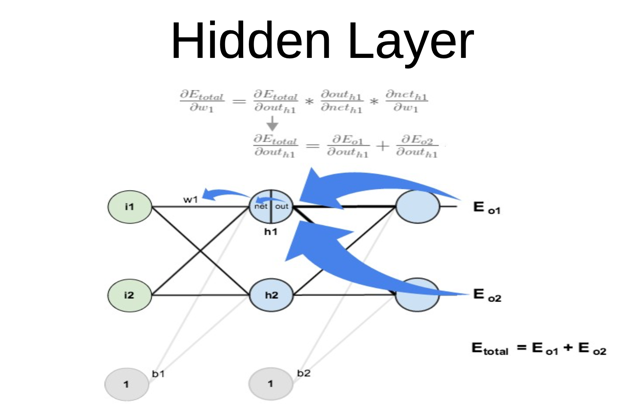

Source:  DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [ ]:
red_png(r'./../png/NN_HiddenLayer.png', factor=.4)

How much a change in $w_1$ affects the total error ?

$E_{total} = E_{o1} + E_{o2} \
\Rightarrow \
\dfrac{\partial E_{total}}{\partial w_{1}} = \
\dfrac{\partial E_{o1}}{\partial w_{1}} + \dfrac{\partial E_{o2}}{\partial w_{1}}$

By applying the chain rule we have:

$ \dfrac{\partial E_{o1}}{\partial w_{1}} =  \
  \dfrac{\partial E_{o1}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial out_{h1}} * \dfrac{\partial out_{h1}}{\partial net_{h1}} * \dfrac{\partial net_{h1}}{\partial w_{1}}$  

$ \dfrac{\partial E_{o2}}{\partial w_{1}} =  \
  \dfrac{\partial E_{o2}}{\partial out_{o1}} * \dfrac{\partial out_{o2}}{\partial net_{o2}} * \dfrac{\partial net_{o2}}{\partial out_{h1}} * \dfrac{\partial out_{h1}}{\partial net_{h1}} * \dfrac{\partial net_{h1}}{\partial w_{1}}$

We have already demonstrated that: 

- $ \dfrac{\partial E_{01}}{\partial out_{o1}} = -(target_{o1} - out_{o1})$  

- $ \dfrac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) .out_{o1} $  

- $ \dfrac{\partial net_{o1}}{\partial out_{h1}} = w_5 $  


We can also easily deduct that  

- $ \dfrac{\partial out_{h1}}{\partial net_{h1}} = (1 - out_{h1}).out_{h1} $

- $ \dfrac{\partial net_{h1}}{\partial w_{1}} = i_1 $

Similarly we have:

- $ \dfrac{\partial E_{02}}{\partial out_{o2}} = -(target_{o2} - out_{o2})$  

- $ \dfrac{\partial out_{o2}}{\partial net_{o2}} = (1 - out_{o2}) .out_{o2} $  

- $ \dfrac{\partial net_{o2}}{\partial out_{h1}} = w_7 $  

- $ \dfrac{\partial out_{h1}}{\partial net_{h1}} = (1 - out_{h1}).out_{h1} $

- $ \dfrac{\partial net_{h1}}{\partial w_{1}} = i_1 $

Putting it all together:

$ \dfrac{\partial E_{o1}}{\partial w_{1}} =  \
  \dfrac{\partial E_{o1}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial out_{h1}} * \dfrac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}} = \
  -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_5 * (1 - out_{h1}).out_{h1} * i_1 $  

$ \dfrac{\partial E_{o2}}{\partial w_{1}} \
=  \dfrac{\partial E_{o2}}{\partial out_{o1}} * \dfrac{\partial out_{o2}}{\partial net_{o2}} * \dfrac{\partial net_{o2}}{\partial out_{h1}} * \dfrac{\partial out_{h1}}{\partial net_{h1}} * \dfrac{\partial net_{h1}}{\partial w_{1}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_7 * (1 - out_{h1}).out_{h1} * i_1 $  

In [ ]:
grad_w1 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i1 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i1
grad_w1

np.float64(0.00028100362016734396)

In the same way, we have:

$\dfrac{\partial E_{o1}}{\partial w_{2}} =  \
 \dfrac{\partial E_{o1}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial out_{h1}} * \dfrac{\partial out_{h1}}{\partial net_{h1}} * \dfrac{\partial net_{h1}}{\partial w_{2}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_5 * (1 - out_{h1}).out_{h1} * i_2 $  

$\dfrac{\partial E_{o2}}{\partial w_{2}} =  \
 \dfrac{\partial E_{o2}}{\partial out_{o2}} * \
 \dfrac{\partial out_{o2}}{\partial net_{o2}} * \
 \dfrac{\partial net_{o2}}{\partial out_{h1}} * \
 \dfrac{\partial out_{h1}}{\partial net_{h1}} * \
 \dfrac{\partial net_{h1}}{\partial w_{2}} \
 = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_7 * (1 - out_{h1}).out_{h1} * i_2 $

In [ ]:
grad_w2 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i2 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i2
print(f"grad_w2 : {grad_w2}")

grad_w2 : 0.0005620072403346879


$d\dfrac{\partial E_{o1}}{\partial w_{3}} =  \dfrac{\partial E_{o1}}{\partial out_{o1}} * \dfrac{\partial out_{o1}}{\partial net_{o1}} * \dfrac{\partial net_{o1}}{\partial out_{h2}} * \dfrac{\partial out_{h2}}{\partial net_{h2}} * \dfrac{\partial net_{h2}}{\partial w_{3}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_6 * (1 - out_{h2}).out_{h2} * i_1 $  

  $\dfrac{\partial E_{o2}}{\partial w_{3}} = \dfrac{\partial E_{o2}}{\partial out_{o2}} * \dfrac{\partial out_{o2}}{\partial net_{o2}} * \dfrac{\partial net_{o2}}{\partial out_{h2}} * \dfrac{\partial out_{h2}}{\partial net_{h2}} * \dfrac{\partial net_{h2}}{\partial w_{3}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_8 * (1 - out_{h2}).out_{h2} * i_1$

In [ ]:
grad_w3 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i1 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*i1
print(f"grad_w3 : {grad_w3}")

grad_w3 : 0.0003274589311789473


$ \frac{\partial E_{o1}}{\partial w_{4}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{4}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_6 * (1 - out_{h2}).out_{h2} * i_2 $  

  
$ \frac{\partial E_{o2}}{\partial w_{4}} =  \frac{\partial E_{o2}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{4}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_8 * (1 - out_{h2}).out_{h2} * i_2 $

In [ ]:
grad_w4 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i2 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*out_h2*i2
print(f"grad_w4 : {grad_w4}")

grad_w4 : 0.00099542547052172


In practice, we derive the $E_i$ by the $out_{oi}$ and after we find the direction to come back to the $w_i$ that we are looking for.

In [ ]:
# Erreur totale
err_tot = err_o1 + err_o2
err_tot

np.float64(0.2983711087600027)

In [ ]:
%%time
for i in range(1000):
    grad_w1 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i1 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i1
    w1 = w1 - lr * grad_w1
    
    grad_w2 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i2 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i2
    w2 = w2 - lr * grad_w2

    grad_w3 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i1 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*i1
    w3 = w3 - lr * grad_w3

    grad_w4 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i2 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*out_h2*i2
    w4 = w4 - lr * grad_w4

    grad_w5 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h1
    w5 = w5 - lr * grad_w5
    
    grad_w6 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h2
    w6 = w6 - lr * grad_w6
    
    grad_w7 = -(target_o2 - out_o2)*(1-out_o2)*out_o2*out_h1
    w7 = w7 - lr * grad_w7
    
    grad_w8 = -(target_o2 - out_o2) * (1 - out_o2) * out_o2 * out_h2
    w8 = w8 - lr * grad_w8

CPU times: user 5.77 ms, sys: 320 μs, total: 6.09 ms
Wall time: 6.65 ms


In [ ]:
print(' w1:',round(w1,9),'\n','w2:',round(w2,9),'\n','w3:',round(w3,9),'\n','w4:',round(w4,9),'\n',
      'w5:',round(w5,9),'\n','w6:',round(w6,9),'\n','w7:',round(w7,9),'\n','w8:',round(w8,9),'\n')

 w1: 19.341698176 
 w2: 38.583396353 
 w3: 19.467564525 
 w4: 36.806811096 
 w5: -40.683520282 
 w6: -40.883813924 
 w7: 11.801270239 
 w8: 11.920121108 



In [ ]:
# Forward pass with sigmoid as activation fonction
out_o1, out_o2 = fwd_pass(i1,i2)

print(f"out_o1 : {out_o1}")
print(f"out_o2 : {out_o2}")

out_o1 : 1.1324644501364648e-35
out_o2 : 0.999999999968328


In [ ]:
err_o1 = err_mse(out_o1, target_o1)
print(err_o1)

0.0001


In [ ]:
err_o2 = err_mse(out_o2, target_o2)
print(err_o2)

9.999999936656021e-05


In [ ]:
# Erreur totale
err_tot = err_o1 + err_o2
print(err_tot)

0.00019999999936656023


In [ ]:
err_o1 = 1/2*(out_o1 - target_o1)**2
err_o2 = 1/2*(out_o2 - target_o2)**2

# Total error
err_tot = err_o1 + err_o2
print(f"MSE = {err_tot}")

NameError: name 'out_o1' is not defined